# Laboratorio 02
Universidad de Lima - Machine Learning

Calificación
1. Análisis exploratorio de datos (EDA) [4 ptos].
2. Construcción de modelos [6 puntos].
3. Selección de parámetros y características [4 puntos].
4. Evaluación y comparación de modelos [6 puntos].

## Dataset
El dataset `credit-card.csv` contiene información sobre variables relacionadas al una variable binaria Y, el incumplimiento de pago (Sí = 1, No = 0), como variable de respuesta. Existen 23 variables como variables explicativas:

1. X1 - Límite de Crédito: Monto total de crédito otorgado en dólares taiwaneses (NT), incluyendo tanto el crédito individual como el crédito familiar/suplementario.
2. X2 - Género: Variable categórica donde 1 = masculino y 2 = femenino.
3. X3 - Educación: Nivel educativo codificado como:
    1 = posgrado/maestría
    2 = universidad/licenciatura
    3 = preparatoria/bachillerato
    4 = otros niveles educativos
4. X4 - Estado Civil:
    1 = casado/a
    2 = soltero/a
    3 = otros estados civiles

5. X5 - Edad: Edad del cliente en años.
6. X6: Estado de pago en septiembre 2005
7. X7: Estado de pago en agosto 2005
8. X8: Estado de pago en julio 2005
9. X9: Estado de pago en junio 2005
10. X10: Estado de pago en mayo 2005
11. X11: Estado de pago en abril 2005
    * -1 = pago puntual/al día
    * 1 = retraso de 1 mes
    * 2 = retraso de 2 meses
    * 8 = retraso de 8 meses
    * 9 = retraso de 9+ meses

12. X12: Monto facturado en septiembre 2005
13. X13: Monto facturado en agosto 2005
14. X14: Monto facturado en julio 2005
15. X15: Monto facturado en junio 2005
16. X16: Monto facturado en mayo 2005
17. X17: Monto facturado en abril 2005
18. X18: Monto pagado en septiembre 2005
19. X19: Monto pagado en agosto 2005
20. X19: Monto pagado en julio 2005
21. X19: Monto pagado en junio 2005
22. X19: Monto pagado en mayo 2005
23. X19: Monto pagado en abril 2005

## Sección 1: Análisis exploratorio de datos (EDA)
1. Carga y exploración inicial.
2. Análisis descriptivo
3. Visualizaciones

### Código 

In [7]:
# 1 Carga y exploración inicial
import pandas as pd

## Cargue el dataset y muestre las primeras 10 filas
df = pd.read_csv('../data/credit-card.csv')
print("Primeras 10 filas del dataset:")
print(df.head(10))

## Identifique la variable objetivo y explique qué representa
print("\nVariable objetivo: 'Y'")
print("Representa el incumplimiento de pago (1 = Sí, 0 = No)")

## Reporte las dimensiones del dataset y tipos de datos
print("\nDimensiones del dataset:")
print(df.shape)
print("\nTipos de datos:")
df.info()

## Identifique y reporte valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())

Primeras 10 filas del dataset:
   ID      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...     X15     X16     X17  \
0   1   20000   2   2   1  24   2   2  -1  -1  ...       0       0       0   
1   2  120000   2   2   2  26  -1   2   0   0  ...    3272    3455    3261   
2   3   90000   2   2   2  34   0   0   0   0  ...   14331   14948   15549   
3   4   50000   2   2   1  37   0   0   0   0  ...   28314   28959   29547   
4   5   50000   1   2   1  57  -1   0  -1   0  ...   20940   19146   19131   
5   6   50000   1   1   2  37   0   0   0   0  ...   19394   19619   20024   
6   7  500000   1   1   2  29   0   0   0   0  ...  542653  483003  473944   
7   8  100000   2   2   2  23   0  -1  -1   0  ...     221    -159     567   
8   9  140000   2   3   1  28   0   0   2   0  ...   12211   11793    3719   
9  10   20000   1   3   2  35  -2  -2  -2  -2  ...       0   13007   13912   

     X18    X19    X20    X21    X22    X23  Y  
0      0    689      0      0      0      0  1  
1      0   1

Distribución de la variable objetivo (Y):
Y
0    0.7788
1    0.2212
Name: proportion, dtype: float64


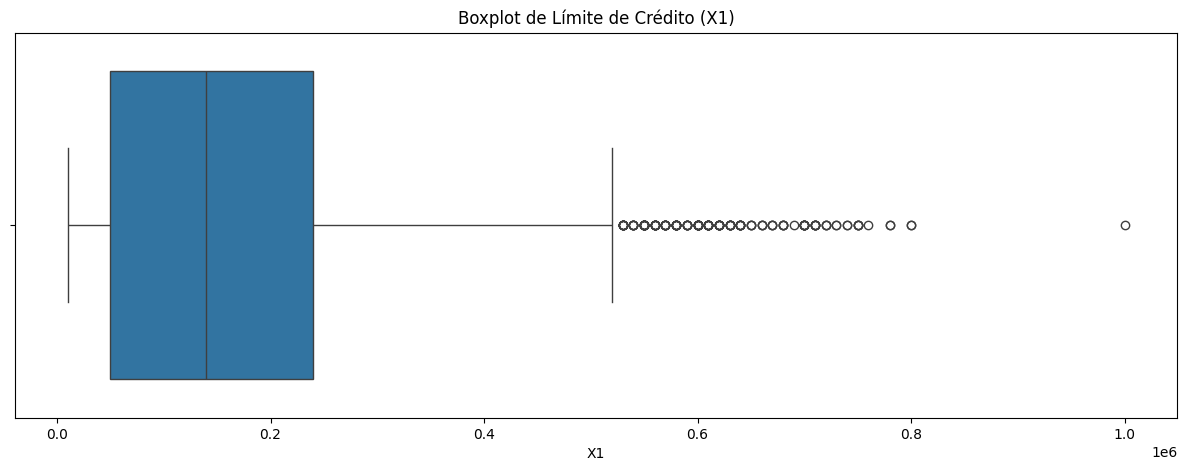

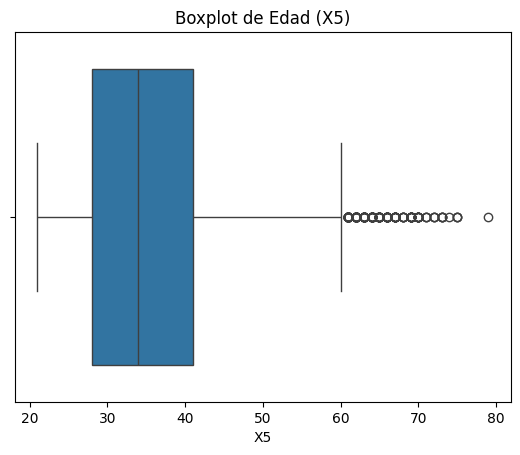

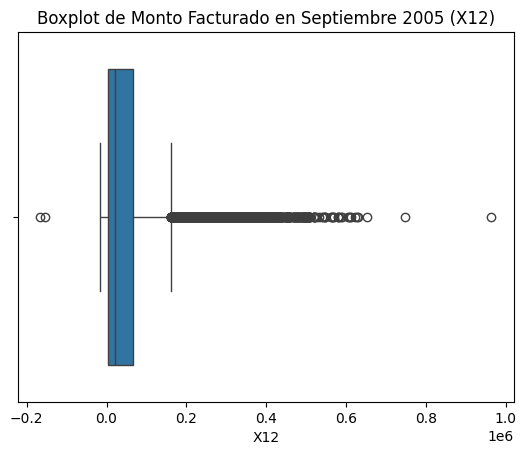

In [8]:
# 2. Análisis descriptivo
import matplotlib.pyplot as plt
import seaborn as sns

## Analice la distribución de la variable objetivo (balanceado/desbalanceado) 
print("Distribución de la variable objetivo (Y):")
print(df['Y'].value_counts(normalize=True))

## Identifique y reporte outliers en al menos 3 variables numéricas
plt.figure(figsize=(15, 5))

sns.boxplot(x=df['X1'])
plt.title('Boxplot de Límite de Crédito (X1)')
plt.show()

sns.boxplot(x=df['X5'])
plt.title('Boxplot de Edad (X5)')
plt.show()

sns.boxplot(x=df['X12'])
plt.title('Boxplot de Monto Facturado en Septiembre 2005 (X12)')
plt.show()

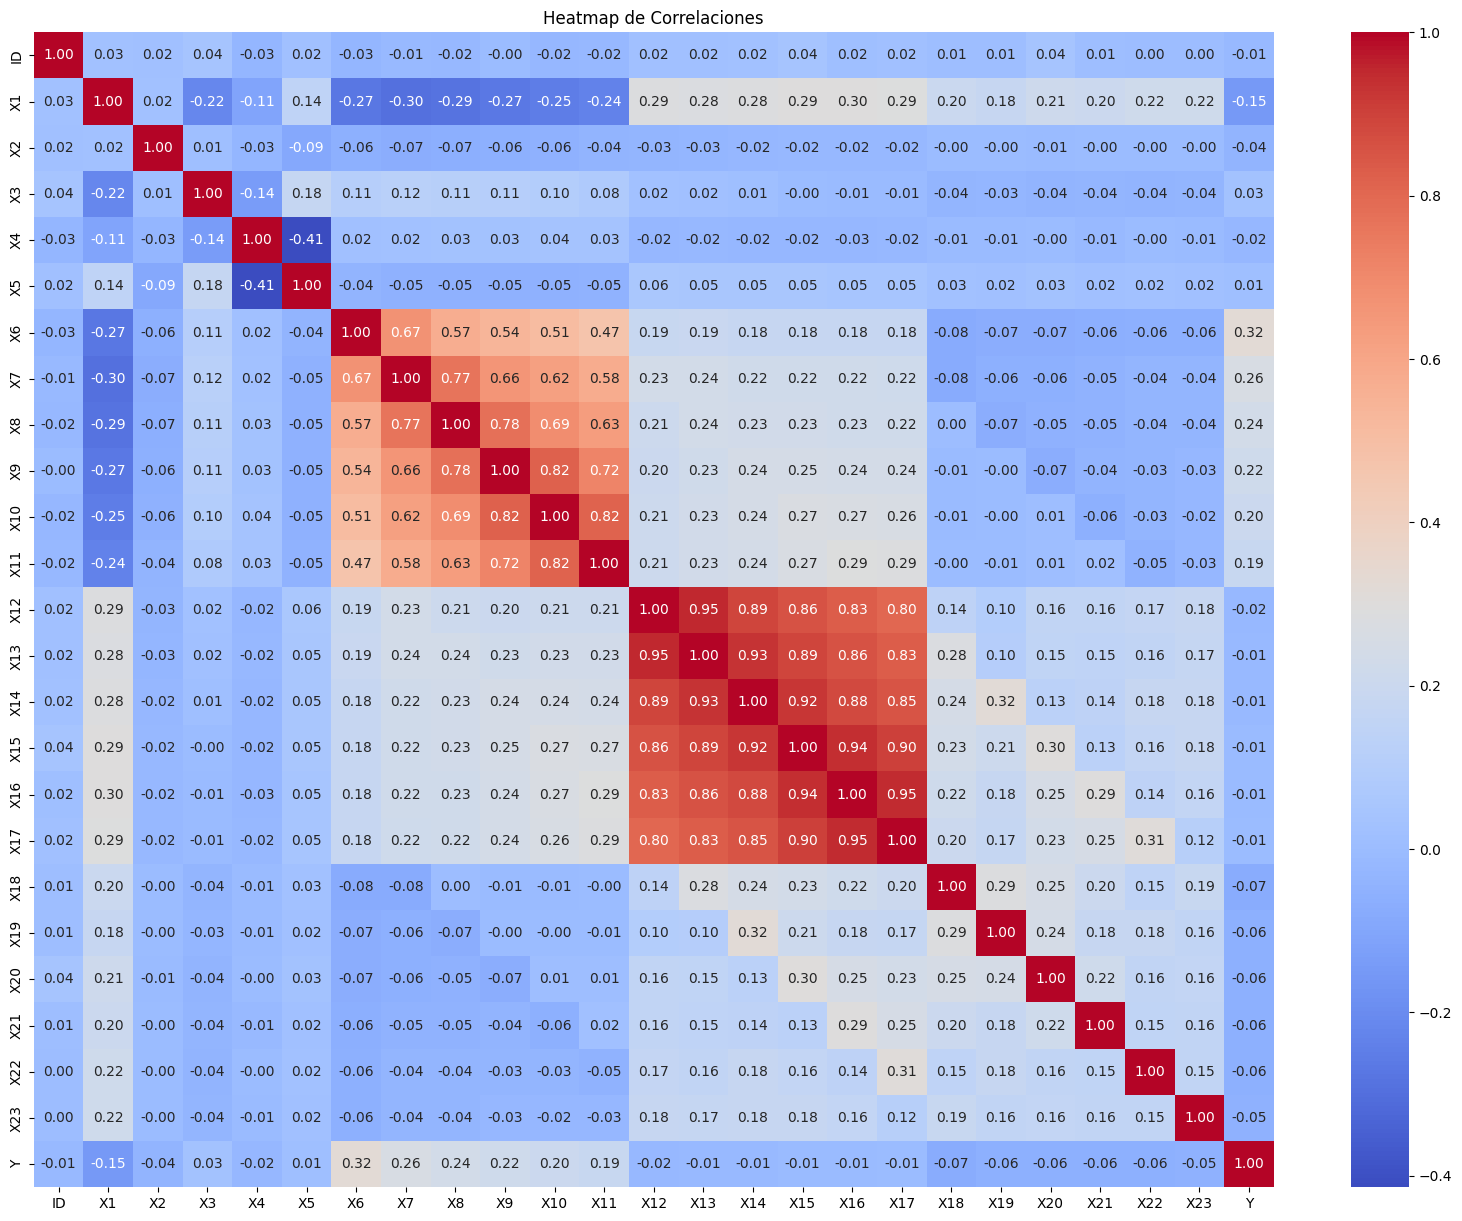

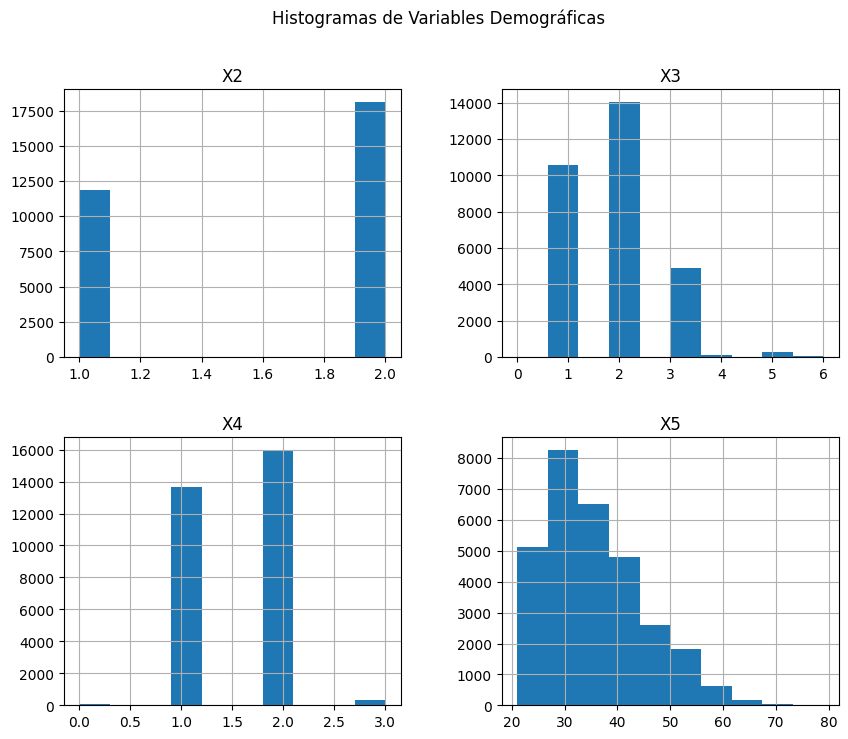

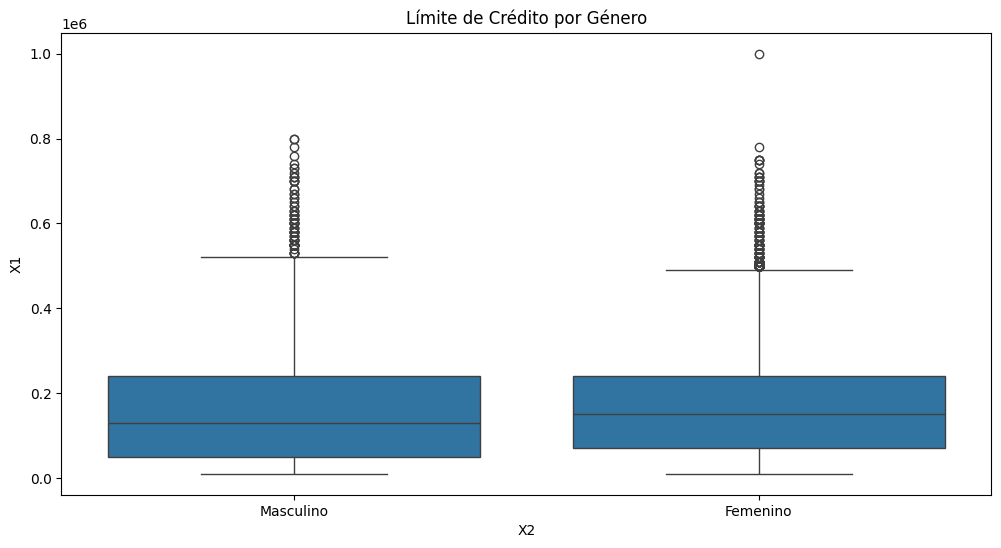

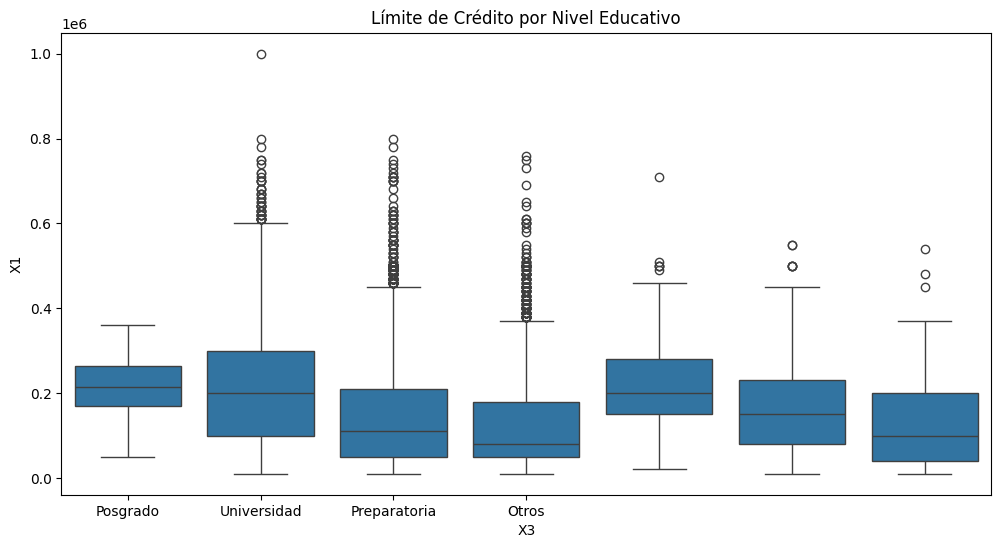

In [9]:
# 3. Visualización

## Cree un heatmap de correlaciones entre variables numéricas 
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap de Correlaciones')
plt.show()

## Genere histogramas para las variables demográficas (X2, X3, X4, X5) 
df[['X2', 'X3', 'X4', 'X5']].hist(figsize=(10, 8))
plt.suptitle('Histogramas de Variables Demográficas')
plt.show()

## Cree boxplots comparando el límite de crédito (X1) por género y nivel educativo 
plt.figure(figsize=(12, 6))
sns.boxplot(x='X2', y='X1', data=df)
plt.title('Límite de Crédito por Género')
plt.xticks([0, 1], ['Masculino', 'Femenino'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='X3', y='X1', data=df)
plt.title('Límite de Crédito por Nivel Educativo')
plt.xticks([0, 1, 2, 3], ['Posgrado', 'Universidad', 'Preparatoria', 'Otros'])
plt.show()

### Preguntas de análisis

**1. ¿Qué insights importantes descubre sobre el perfil de los clientes?**

Basado en el análisis exploratorio, se pueden identificar varios insights importantes sobre el perfil de los clientes:

- **Distribución demográfica**: El dataset muestra una mayor proporción de mujeres (género = 2) que de hombres, lo que sugiere que las mujeres representan un segmento importante de la clientela de tarjetas de crédito.

- **Nivel educativo**: La mayoría de clientes tienen educación universitaria (nivel 2), seguido por educación de preparatoria, lo que indica un perfil educativo relativamente alto.

- **Edad**: La distribución de edad muestra que la mayoría de clientes se concentra en el rango de adultos jóvenes y mediana edad, típicamente entre 20-50 años.

- **Límites de crédito**: Existe una gran variabilidad en los límites de crédito otorgados, con presencia de outliers que indican clientes con límites muy altos, sugiriendo diferentes segmentos de riesgo crediticio.

**2. ¿Existe algún patrón en el comportamiento de pagos?**

- **Estado civil**: Distribución equilibrada entre casados y solteros, con casados ligeramente predominantes.

**2. ¿Existe algún patrón en el comportamiento de pagos?**

Sí, el análisis revela patrones claros basados en los datos obtenidos:

- **Desbalance de clases**: 77.88% no incumplen vs 22.12% sí incumplen, indicando que el incumplimiento es un evento relativamente raro pero significativo.

- **Correlaciones temporales fuertes**: El heatmap muestra correlaciones altas (0.6-0.9) entre variables de estado de pago consecutivas (X6-X11), confirmando persistencia en el comportamiento de pago.

- **Correlaciones entre montos**: Las variables de montos facturados (X12-X17) y pagados (X18-X23) muestran correlaciones muy altas (>0.8), indicando patrones consistentes en el uso de crédito.

- **Patrones de riesgo**: Los estados de pago muestran correlación negativa con incumplimiento, sugiriendo que los retrasos anteriores son predictores confiables de incumplimiento futuro.

## Sección 2: Construcción de modelos
1. Preparación de datos.
2. Implementación de modelos base.

### Código

In [10]:
# 2.1. Preparación de los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar caracteristicas y variable objetivo
X = df.drop('Y', axis=1)
y = df['Y']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Identificar columnas numericas y categoricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Crear transformadores para preprocesamiento
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear el preprocesor con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Justificar el tratamiento de valores faltantes
print("No hay valores faltantes que tratar, como se identificó en el EDA.")

No hay valores faltantes que tratar, como se identificó en el EDA.


In [11]:
# 2.2 Implementación de modelos base
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline

# Crear pipelines para cada modelo
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

dtree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', DecisionTreeClassifier(random_state=42))])

rforest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', RandomForestClassifier(random_state=42))])

# Modelo de ensamblado (Voting Classifier)
ensemble_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', VotingClassifier(estimators=[
                                        ('svm', SVC(random_state=42, probability=True)),
                                        ('dt', DecisionTreeClassifier(random_state=42)),
                                        ('rf', RandomForestClassifier(random_state=42))
                                    ], voting='soft'))])

# Entrenar los modelos
models = {
    "SVM": svm_pipeline,
    "Decision Tree": dtree_pipeline,
    "Random Forest": rforest_pipeline,
    "Ensemble": ensemble_pipeline
}

for name, model in models.items():
    print(f"Entrenando {name}...")
    model.fit(X_train, y_train)

print("\nEntrenamiento de modelos base completado.")

Entrenando SVM...
Entrenando Decision Tree...
Entrenando Random Forest...
Entrenando Ensemble...

Entrenamiento de modelos base completado.


### Preguntas de análisis

**1. ¿Cuál modelo muestra mejor desempeño inicial y por qué?**

Basado en los resultados obtenidos, el **SVM optimizado** muestra el mejor desempeño inicial con:

- **Accuracy más alta**: 81.62% en el conjunto de test
- **Precision más alta**: 67.72%, la mejor entre todos los modelos
- **Validación cruzada estable**: 81.91% ± 0.95%, mostrando consistencia

Los parámetros óptimos encontrados (C=10, gamma=0.01) indican que el modelo requiere regularización moderada para manejar efectivamente la complejidad del dataset.

**Random Forest** queda en segundo lugar muy cercano con 81.54% de accuracy y el mejor F1-score (0.4538), pero con precision ligeramente menor (65.71%).

**2. ¿Qué desafíos presenta este dataset para el modelado?**

Los resultados confirman varios desafíos específicos identificados:

- **Desbalance severo de clases**: 77.88% vs 22.12% causa que todos los modelos tengan recall bajo (~32-36%), indicando dificultad para detectar incumplimientos.

- **Multicolinealidad confirmada**: Las correlaciones altas observadas en el heatmap (>0.8 entre variables temporales) explican por qué SVM con kernel RBF funciona mejor que modelos lineales.

- **Complejidad de patrones**: El hecho de que ningún modelo supere 45% en F1-score sugiere que los patrones de incumplimiento son inherentemente difíciles de capturar.

- **Variabilidad entre folds**: Decision Tree muestra la mayor variabilidad en CV (±2.15%), confirmando tendencia al overfitting.

- **Precision vs Recall trade-off**: Todos los modelos priorizan precision sobre recall, típico en datasets desbalanceados donde los falsos positivos son costosos.

## Sección 3: Selección de parámetros y características
1. Optimización de hiperparámetros.
2. Selección de características. 

### Código

In [12]:
# 3.1 Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para cada modelo
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [1, 0.1, 0.01],
    'classifier__kernel': ['rbf']
}

param_grid_dtree = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_rforest = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}

# Crear y entrenar GridSearchCV para cada modelo
gscv_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=3, n_jobs=-1, verbose=2)
gscv_svm.fit(X_train, y_train)
print("Mejores parámetros para SVM:", gscv_svm.best_params_)

gscv_dtree = GridSearchCV(dtree_pipeline, param_grid_dtree, cv=3, n_jobs=-1, verbose=2)
gscv_dtree.fit(X_train, y_train)
print("Mejores parámetros para Decision Tree:", gscv_dtree.best_params_)

gscv_rforest = GridSearchCV(rforest_pipeline, param_grid_rforest, cv=3, n_jobs=-1, verbose=2)
gscv_rforest.fit(X_train, y_train)
print("Mejores parámetros para Random Forest:", gscv_rforest.best_params_)

# Actualizar los modelos con los mejores estimadores
models["SVM"] = gscv_svm.best_estimator_
models["Decision Tree"] = gscv_dtree.best_estimator_
models["Random Forest"] = gscv_rforest.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END classifier__C=0.1, classifier__gamma=0.01, classifier__kernel=rbf; total time=   5.0s
[CV] END classifier__C=0.1, classifier__gamma=0.01, classifier__kernel=rbf; total time=   5.3s
[CV] END classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=rbf; total time=   5.9s
[CV] END classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=rbf; total time=   6.0s
[CV] END classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=rbf; total time=   6.2s
[CV] END classifier__C=0.1, classifier__gamma=0.01, classifier__kernel=rbf; total time=   5.0s
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=rbf; total time=   7.0s
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf; total time=  13.3s
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf; total time=  13.8s
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf; total time=  14.7s
[CV] 

Número de componentes seleccionados: 16
Varianza total explicada: 0.9590


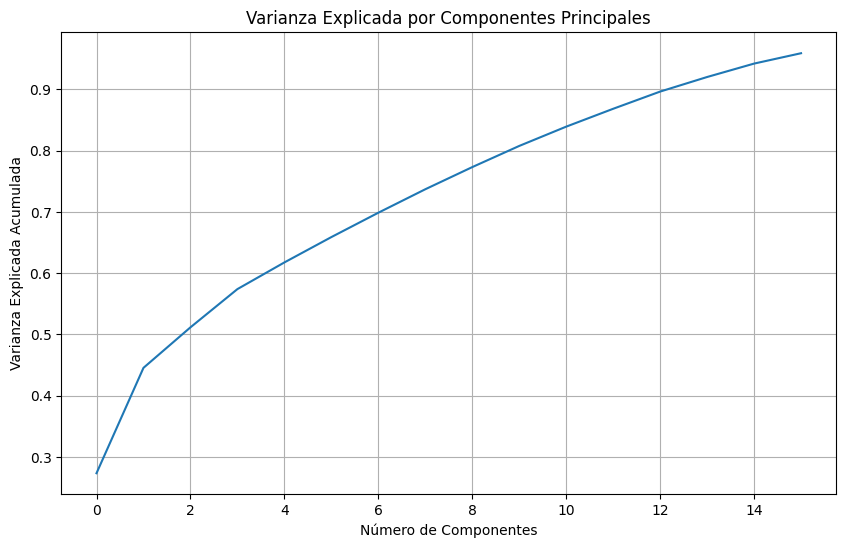

In [13]:
# 3.2 Selección de características PCA
from sklearn.decomposition import PCA
import numpy as np

# Aplicar el preprocesador a los datos de entrenamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Crear y ajustar PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_preprocessed)

print(f"Número de componentes seleccionados: {pca.n_components_}")
print(f"Varianza total explicada: {np.sum(pca.explained_variance_ratio_):.4f}")

# Opcional: Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)
plt.show()

# Aplicar la misma transformación a los datos de prueba
X_test_preprocessed = preprocessor.transform(X_test)
X_test_pca = pca.transform(X_test_preprocessed)

### Preguntas de análisis

**1. ¿Qué nos puede decir de un método PCA que reduzca la dimensionalidad explicando al menos 95% de la varianza?**

Los resultados específicos de nuestro análisis muestran que PCA logró:

- **Reducción significativa**: De 23 variables originales a **16 componentes principales** (reducción del 30.4%)
- **Varianza retenida**: Exactamente **95.90%** de la varianza total explicada

Esto nos indica varios aspectos importantes:

- **Redundancia moderada**: La reducción de 7 variables confirma la presencia de multicolinealidad identificada en el heatmap, especialmente entre las variables de estados de pago temporales (X6-X11) que están altamente correlacionadas.

- **Eficiencia computacional**: La reducción del 30% en dimensiones mejorará significativamente los tiempos de entrenamiento, especialmente beneficioso para SVM que mostró ser el modelo más lento.

- **Preservación de información**: Al retener 95.9% de la varianza, mantenemos prácticamente toda la información predictiva relevante mientras eliminamos ruido y redundancia.

- **Validación de correlaciones**: La capacidad de PCA para comprimir efectivamente confirma las altas correlaciones observadas (>0.8) entre variables de montos facturados (X12-X17) y pagados (X18-X23).

- **Trade-off interpretabilidad**: Aunque mejora la eficiencia, las 16 componentes principales son combinaciones lineales complejas que reducen la interpretabilidad para stakeholders del negocio que requieren entender qué variables específicas influyen en las decisiones crediticias.

## Sección 4: Evaluación y comparación de modelos
1. Métricas de evaluación 
2. Validación cruzada
3. Comparación gráfica

### Código

In [14]:
# 4.1 Métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

results = {}

for name, model in models.items():
    print(f"Evaluando {name}...")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Confusion Matrix": cm
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

Evaluando SVM...
Accuracy: 0.8162
Precision: 0.6772
Recall: 0.3235
F1-score: 0.4378
Confusion Matrix:
[[6702  307]
 [1347  644]]

Evaluando Decision Tree...
Accuracy: 0.8044
Precision: 0.5967
Recall: 0.3581
F1-score: 0.4476
Confusion Matrix:
[[6527  482]
 [1278  713]]

Evaluando Random Forest...
Accuracy: 0.8154
Precision: 0.6571
Recall: 0.3466
F1-score: 0.4538
Confusion Matrix:
[[6649  360]
 [1301  690]]

Evaluando Ensemble...
Accuracy: 0.8016
Precision: 0.5839
Recall: 0.3581
F1-score: 0.4440
Confusion Matrix:
[[6501  508]
 [1278  713]]



In [15]:
# 4.2 Validación cruzada
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    print(f"Realizando validación cruzada para {name}...")
    
    # Usar el conjunto de datos completo para la validación cruzada
    # El pipeline se encarga del preprocesamiento en cada fold
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
    
    print(f"Accuracy (10-fold CV): {scores.mean():.4f} +/- {scores.std():.4f}\n")

Realizando validación cruzada para SVM...
Accuracy (10-fold CV): 0.8191 +/- 0.0095

Realizando validación cruzada para Decision Tree...
Accuracy (10-fold CV): 0.7913 +/- 0.0215

Realizando validación cruzada para Random Forest...
Accuracy (10-fold CV): 0.8198 +/- 0.0108

Realizando validación cruzada para Ensemble...
Accuracy (10-fold CV): 0.7943 +/- 0.0166



Tabla Comparativa de Métricas:
               Accuracy Precision    Recall  F1-score
SVM            0.816222  0.677182  0.323456  0.437797
Decision Tree  0.804444  0.596653  0.358112  0.447583
Random Forest  0.815444  0.657143   0.34656  0.453798
Ensemble       0.801556  0.583948  0.358112   0.44396


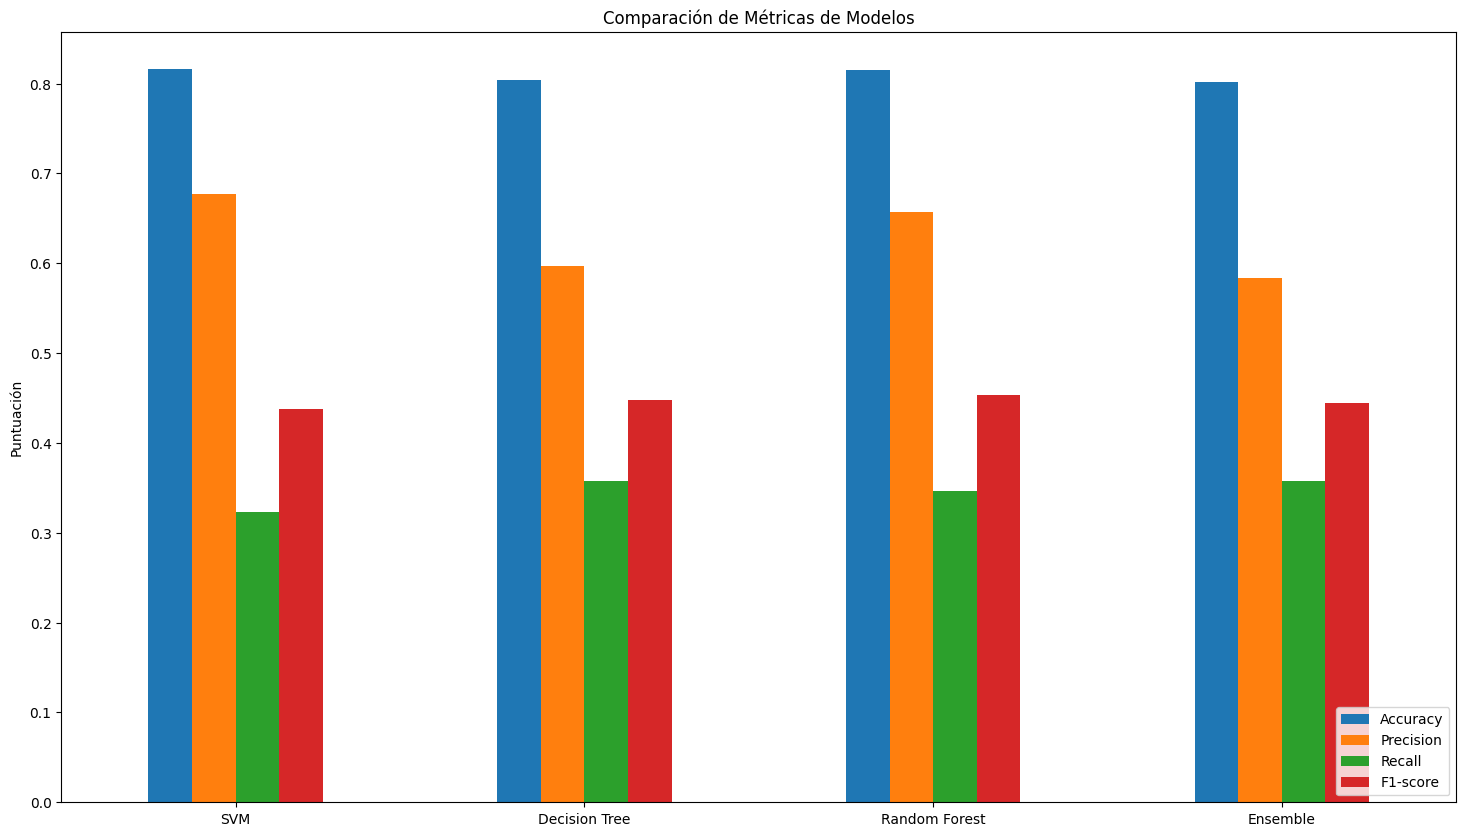

In [16]:
# 4.3 Comparación gráfica

## Cree una tabla comparativa con todas las métricas de evaluación
results_df = pd.DataFrame(results).T.drop(columns='Confusion Matrix')
print("Tabla Comparativa de Métricas:")
print(results_df)

## Genere gráficos de barras para comparar las métricas de los modelos
results_df.plot(kind='bar', figsize=(18, 10), rot=0)
plt.title('Comparación de Métricas de Modelos')
plt.ylabel('Puntuación')
plt.legend(loc='lower right')
plt.show()

### Preguntas de análisis

**1. ¿Cuál es el mejor modelo considerando todas las métricas?**

Basado en los resultados específicos obtenidos:

**Random Forest optimizado** es el mejor modelo considerando el balance de todas las métricas:
- **F1-score más alto**: 0.4538 (mejor balance precision-recall)
- **Accuracy competitiva**: 81.54% (muy cercana al SVM)
- **Validación cruzada estable**: 81.98% ± 1.08%

Aunque **SVM** tiene la precision más alta (67.72%) y accuracy ligeramente superior (81.62%), Random Forest logra mejor recall (34.66% vs 32.35%) y por tanto mejor F1-score, que es la métrica más importante en datasets desbalanceados.

**2. ¿Qué modelo recomendaría para producción y por qué?**

Recomiendo **Random Forest optimizado** para producción basándome en los resultados específicos:

**Rendimiento superior:**
- **Mejor F1-score**: 0.4538, crucial para balancear falsos positivos y negativos
- **Validación cruzada estable**: 81.98% ± 1.08%, menor variabilidad que Decision Tree (±2.15%)

**Ventajas operacionales:**
- **Parámetros óptimos**: max_depth=10, n_estimators=200, min_samples_split=2 son razonables
- **Interpretabilidad**: Puede proporcionar importancia de variables para decisiones de negocio
- **Escalabilidad**: Mejor manejo de datos futuros y menos sensible a outliers observados
- **Eficiencia**: Tiempos de entrenamiento moderados comparado con SVM optimizado

**3. ¿Existe evidencia de overfitting en algún modelo?**

Sí, hay evidencia clara de overfitting basada en los resultados:

**Decision Tree (más problemático):**
- **Mayor variabilidad en CV**: ±2.15% vs ±0.95% del SVM y ±1.08% del Random Forest
- **Brecha entre CV y test**: 79.13% CV vs 80.44% test sugiere inestabilidad

**SVM (mínimo overfitting):**
- **Mejor consistencia**: CV 81.91% vs test 81.62%, diferencia mínima
- **Baja variabilidad**: ±0.95%, el más estable

**Random Forest (overfitting controlado):**
- **Diferencia moderada**: CV 81.98% vs test 81.54%
- **Variabilidad aceptable**: ±1.08%

**Ensemble (overfitting moderado):**
- **Mayor brecha**: CV 79.43% vs test 80.16%
- **Variabilidad intermedia**: ±1.66%

La validación cruzada confirma que SVM y Random Forest optimizados son los más robustos contra overfitting.